## DOAA CA1 : PREDICTING CAR PRICES WITH REGRESSION
Name : Dario Prawara Teh Wei Rong | Class : DAAA/FT/2B/04 | Admission Number : 2201858

Objective : For this regression analysis, we will be using the `100,000 UK Cars Dataset` to perform regression and identify the best model for this scenario. To evaluate the models, we will be mainly looking at r-squared, MAPE, MSE, and MAE to determine which model is best for this task.

### IMPORTING RELEVANT MODULES AND LIBRARIES
Import numpy, pandas, matplotlib, pickle and sklearn modules for use later.


In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Import the sklearn libraries
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
import joblib


### IMPORTING THE DATASET 

To import the datasets, use `pd.concat([])` to concatenate the various car data into one merged dataframe.

In [2]:
# Load all the datasets from the data folder
audi_df = pd.read_csv('dataset/audi.csv')
bmw_df = pd.read_csv('dataset/bmw.csv')
cclass_df = pd.read_csv('dataset/cclass.csv')
focus_df = pd.read_csv('dataset/focus.csv')
ford_df = pd.read_csv('dataset/ford.csv')
hyundi_df = pd.read_csv('dataset/hyundi.csv')
merc_df = pd.read_csv('dataset/merc.csv')
skoda_df = pd.read_csv('dataset/skoda.csv')
toyota_df = pd.read_csv('dataset/toyota.csv')
vauxhall_df = pd.read_csv('dataset/vauxhall.csv')
vw_df = pd.read_csv('dataset/vw.csv')

# Merging all datasets into one dataframe
car_df = pd.concat([audi_df, bmw_df, cclass_df, focus_df, ford_df, hyundi_df, merc_df, skoda_df, toyota_df, vauxhall_df, vw_df], ignore_index=True)

# Display the first 5 rows of the merged dataframe
car_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN


### DEFINING THE PREDICTION TASK AND OUTPUT VARIABLE
Prediction Task : To predict the prices of cars based on various factors such as transmission, mileage, fuel type, tax, mpg, engine size, year and model of car.

Output Variable : 'price' (Numerical Variable)

- The output variable represents the predicted or estimated price of a car based on the given input features.

### OVERVIEW OF THE CAR DATASET

- To summarise the dataset, use pandas functions .info() to get summarized information on the dataset.

- Use pandas function .head() to display the first 5 rows of the dataset.

In [3]:
# Viewing of the car_dataset.csv
print("Overview and Summary of car_dataset.csv : \n")
print(car_df.info())
# Print the first 5 rows of the car dataset
car_df.head()

Overview and Summary of car_dataset.csv : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   tax(£)        4860 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 8.3+ MB
None


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN


### DESCRIBING THE INFORMATION OF THE CAR DATASET

- Determine the number of rows and columns in the dataset : use shape[0] for rows and shape[1] for columns.

- Identify the datatype and number of non-null values : use .info() to summarise information on the dataset.

- Ensure the dataset does not contain NA values : use .isnull().sum() to sum the NA values by column (if any). If values are returned as 0, it indicates that there are no NA values.

- Retrieve the number of unique values for each column in the dataset using nunique().

In [4]:
# Information of the dataset

# Extracting the rows and columns of the dataset
print(f"\nThere are {car_df.shape[0]} rows and {car_df.shape[1]} columns in the car_df dataset.\n")

# Check for any missing values
print(f"Checking for missing or na values in the dataset:\n---------------------------\n{car_df.isnull().sum().sort_values(ascending=False)}")

# Extract the unique values from each column of the dataset
print(f"\nCount of unique values in the dataset columns:\n---------------------------\n{car_df.nunique()}")

# Describing the dataset
print(f"\nSummarising the numerical values in the dataset:\n---------------------------\n{car_df.drop(columns=['model', 'year']).describe()}")


There are 108540 rows and 10 columns in the car_df dataset.

Checking for missing or na values in the dataset:
---------------------------
tax(£)          103680
tax              14213
mpg               9353
model                0
year                 0
price                0
transmission         0
mileage              0
fuelType             0
engineSize           0
dtype: int64

Count of unique values in the dataset columns:
---------------------------
model             195
year               29
price           13299
transmission        4
mileage         42314
fuelType            5
tax                48
mpg               208
engineSize         42
tax(£)             24
dtype: int64

Summarising the numerical values in the dataset:
---------------------------
               price        mileage           tax           mpg  \
count  108540.000000  108540.000000  94327.000000  99187.000000   
mean    16890.124046   23025.928469    120.256183     55.166825   
std      9756.266820   21176.

### DATA PRE-PROCESSING AND DATA WRANGLING

2. Check for missing values and handle them appropriately
3. Remove duplicate data
4. Standardizing column names for categorical data

**First, we will drop unnecessary columns. In this case, it is tax(£).**

In [5]:
# Dropping unnecessary columns from the dataset
car_df.drop(['tax(£)'], axis=1, inplace=True)
car_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


**Now, we will check the number of missing rows in the dataset.**

In [6]:
# Check for missing values and display rows with missing values
missing_rows = car_df[car_df.isna().any(axis=1)]
print(f'Number of missing rows : {missing_rows.shape[0]}')
missing_rows


Number of missing rows : 14213


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
21449,C Class,2020,30495,Automatic,1200,Diesel,NaN,NaN,2.0
21450,C Class,2020,29989,Automatic,1000,Petrol,NaN,NaN,1.5
21451,C Class,2020,37899,Automatic,500,Diesel,NaN,NaN,2.0
21452,C Class,2019,30399,Automatic,5000,Diesel,NaN,NaN,2.0
21453,C Class,2019,29899,Automatic,4500,Diesel,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...
53622,I30,2016,8680,Manual,25906,Diesel,NaN,78.4,1.6
53623,I40,2015,7830,Manual,59508,Diesel,NaN,65.7,1.7
53624,I10,2017,6830,Manual,13810,Petrol,NaN,60.1,1.0
53625,Tucson,2018,13994,Manual,23313,Petrol,NaN,44.8,1.6


Since the number of rows with missing values is quite large, we will not simply drop these rows from the dataset. Instead, we will **impute** these values by filling the NaN values with its respective median. 

After investigating, the apparent reason for why there are missing values is that some car brands, although they should have tax, were missing the tax and mpg columns in their data. Hence, the missing values is likely due to an error in the data, so we will impute the tax and mpg values to provide a more accurate representation of those car brands.

**Now, we will impute the missing values using median.**

In [7]:
# Columns with missing values: 'tax' and 'mpg'
# Since 'tax' and 'mpg' are numerical columns, we'll fill missing values with their median
for col in ['tax', 'mpg']:
    median = car_df[col].median()
    car_df[col].fillna(median, inplace=True)
    
# Review updated data info
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           108540 non-null  float64
 7   mpg           108540 non-null  float64
 8   engineSize    108540 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.5+ MB


**Here, we will check for duplicate rows of data and remove if needed.**
- From our analysis, we see that after removal, the number of duplicate rows from 33687 dropped to 0, hence indicating that the removal was successful.

In [8]:
# Count number of duplicate rows of data and print them
duplicate = car_df[car_df.duplicated(keep=False)]
print("Number of duplicate rows before removal:", duplicate.count().sum())

# Drop duplicates
car_df.drop_duplicates(inplace=True)

# Print to check if duplicates are removed
print("Number of duplicate rows after removal:", car_df.duplicated().sum())

Number of duplicate rows before removal: 33687
Number of duplicate rows after removal: 0


**Now, we will check for any unusual values in our dataset.**

- From here, we see that for certain car models, even though they run on petrol and diesel, their engine sizes are 0.
- This could indicate data entry errors, hence we will simply drop these rows as the number of rows with unusual values are small.

In [9]:
# Checking engine size values for non-electric and non-hybrid vehicles
unusual_rows = car_df[(car_df['engineSize'] == 0) & ~car_df['fuelType'].isin(['electric', 'hybrid'])]

# Dropping the unusual rows
car_df.drop(unusual_rows.index, inplace=True)
car_df


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


**Finally, we will standardize the column names in the processed dataset.**
- By standardizing the column names (letter casing), we are able to make the dataset more uniform.

In [10]:
# Convert all column names to lower case
car_df.columns = car_df.columns.str.lower()

# Print the new column names to confirm the changes
print(car_df.columns)

# Overview dataset after pre-processing
car_df.head()

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fueltype', 'tax',
       'mpg', 'enginesize'],
      dtype='object')


,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0


### EXPLORATORY DATA ANALYSIS

To gather insights and understand the data better, we will perform EDA and generate charts on the car data.

#### GRAPH 1 : NUMERICAL VARIABLE DISTRIBUTION - PRICE, MILEAGE, TAX, MPG, ENGINE SIZE

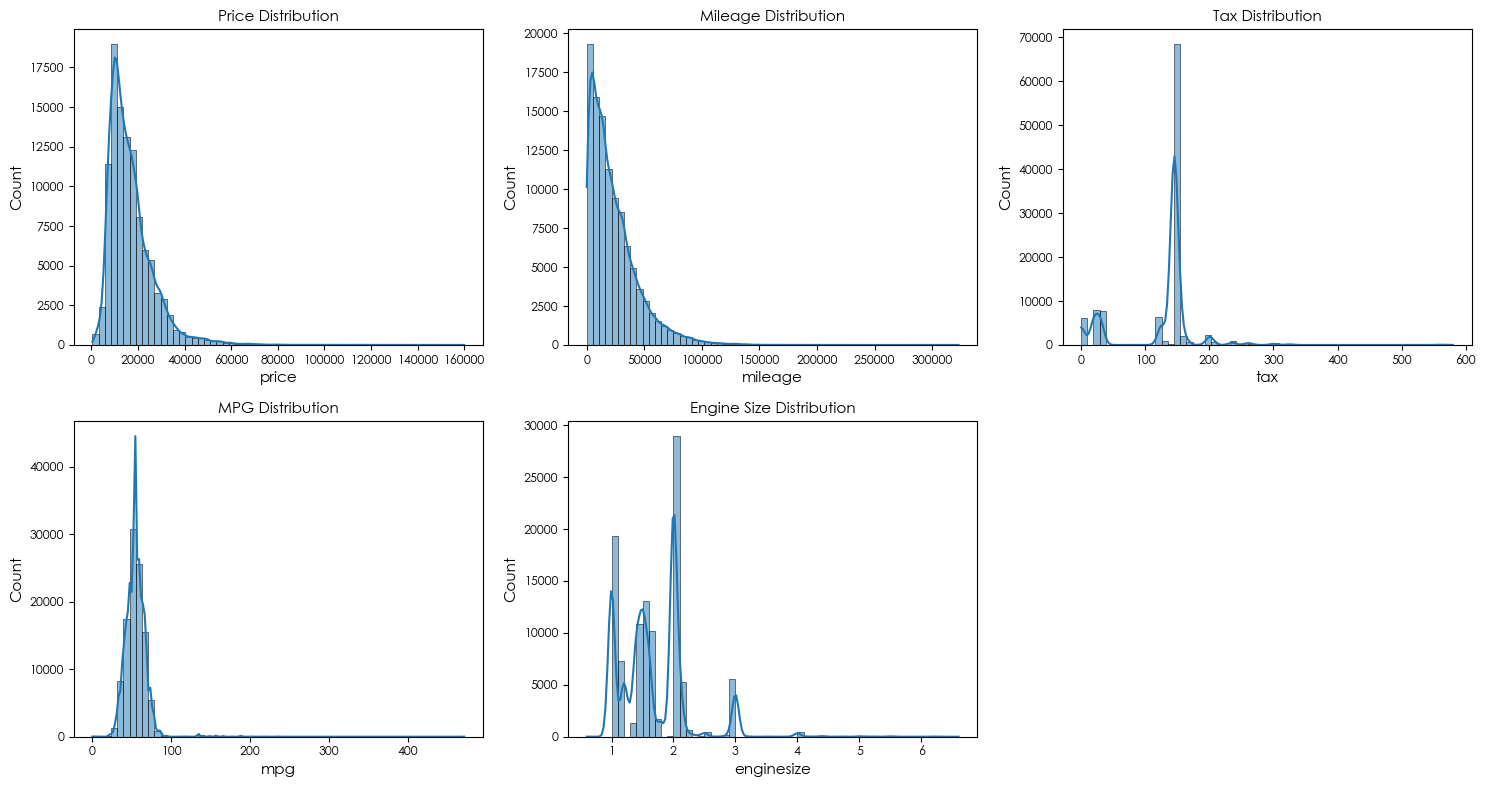

In [11]:
# Set custom font properties
font = {'family': 'Century Gothic', 'weight': 'normal', 'size': 11}
plt.rc('font', **font)

# Creating subplots for histograms of price, mileage, tax, mpg, and engine size
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
subplot_titles = ['Price Distribution', 'Mileage Distribution', 'Tax Distribution', 'MPG Distribution', 'Engine Size Distribution']

# Plotting the histogram of numerical variables
hist_features = ['price', 'mileage', 'tax', 'mpg', 'enginesize']
for i, feature in enumerate(hist_features):
    row = i // 3
    col = i % 3
    sns.histplot(car_df[feature], kde=True, ax=axes[row, col], bins=60)
    axes[row, col].set_title(subplot_titles[i], fontsize=11)
    axes[row, col].tick_params(axis='both', which='both', labelsize=9)  # Adjust tick label font size

# Clearing the last subplot (which is not used)
axes[1, 2].axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### GRAPH 2 : DISTRIBUTION OF TOP 20 CAR MODELS IN THE DATASET

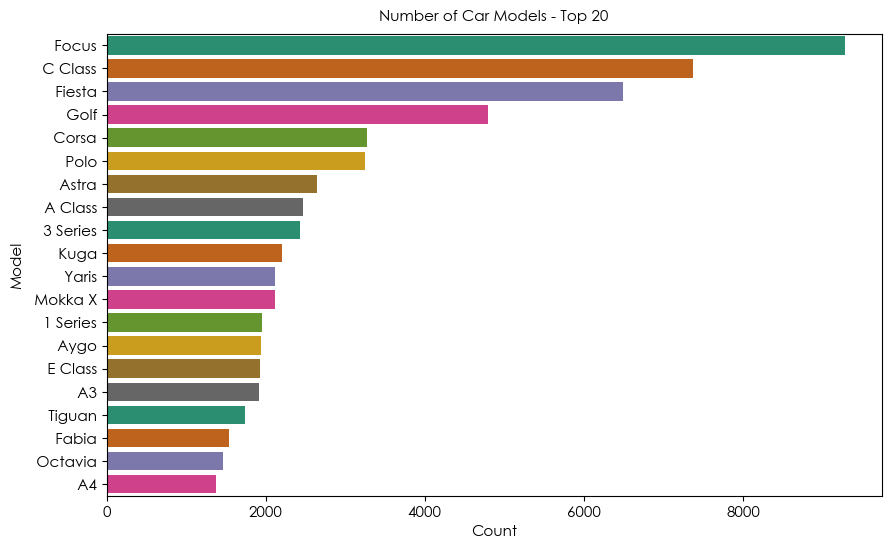

In [12]:
# Visualising distribution of car models

# Set custom font properties
plt.rcParams.update({'font.size': 11, 'font.family': 'Century Gothic'})

# Prepare data for the top N models
top_n = 20  # Number of top models to display
model_counts = car_df['model'].value_counts().head(top_n)
top_models = model_counts.index

custom_palette = sns.color_palette("Dark2")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model_counts, y=top_models, palette=custom_palette)
plt.title('Number of Car Models - Top 20', fontsize=11, y=1.01)
plt.xlabel('Count')
plt.ylabel('Model')
plt.show()

#### GRAPH 3 : BOXPLOT OF TRANSMISSION TYPES AND FUEL TYPES

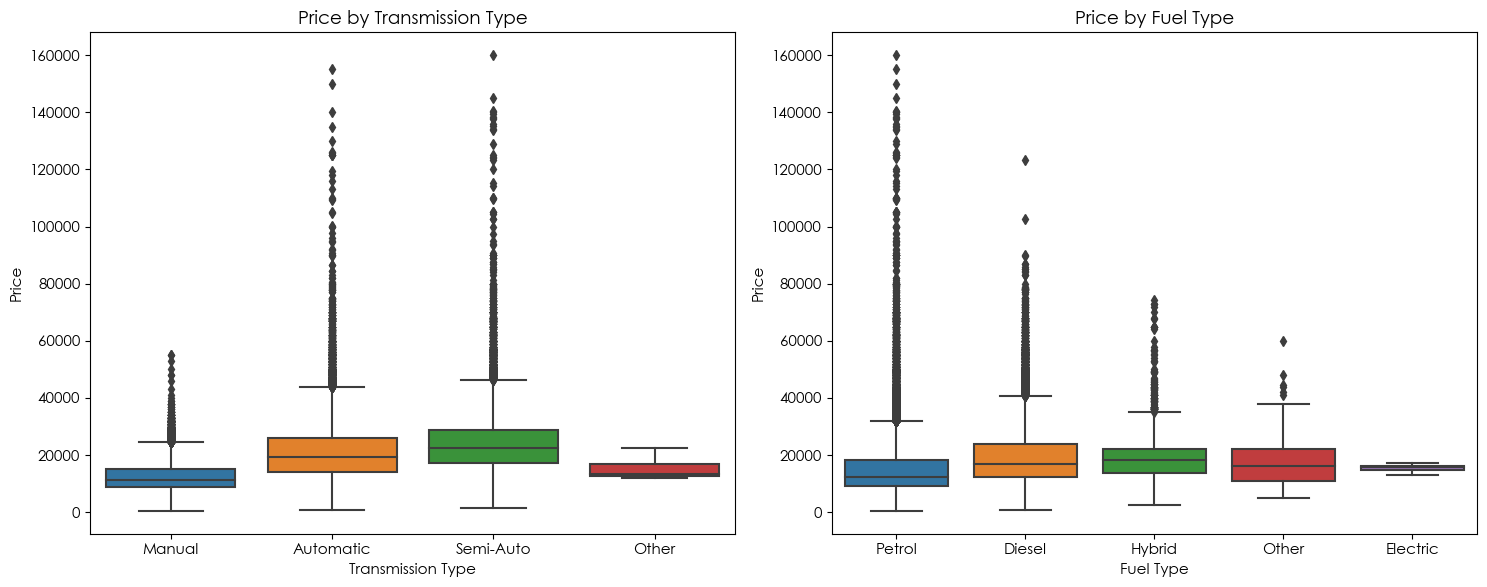

In [13]:
# Compare between transmission and fuel type

# Set custom font properties
plt.rcParams.update({'font.size': 11, 'font.family': 'Century Gothic'})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for price distribution across different transmissions
sns.boxplot(x='transmission', y='price', data=car_df, ax=axes[0])
axes[0].set_title('Price by Transmission Type')
axes[0].set_xlabel('Transmission Type')
axes[0].set_ylabel('Price')

# Boxplot for price distribution across different fuel types
sns.boxplot(x='fueltype', y='price', data=car_df, ax=axes[1])
axes[1].set_title('Price by Fuel Type')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Price')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### GRAPH 4 : CORRELATION MATRIX OF CAR VARIABLES

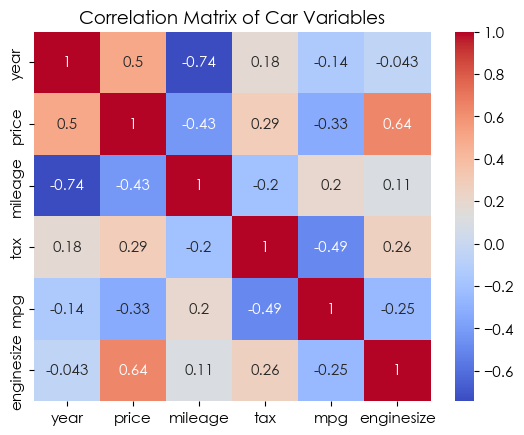

In [14]:
# Correlation Matrix - Heatmap of Car Price Variables

# Set custom font properties
font = {'family': 'Century Gothic', 'weight': 'normal', 'size': 11}
plt.rc('font', **font)

# Create a copy without categorical variables
car_df_copy = car_df.iloc[:, [i for i in range(1, car_df.shape[1]) if i not in [3, 5]]]

corr_matrix = car_df_copy.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Car Variables')
plt.show()

#### GRAPH 5 : ASSESSING OUTLIERS IN NUMERICAL CAR VARIABLES

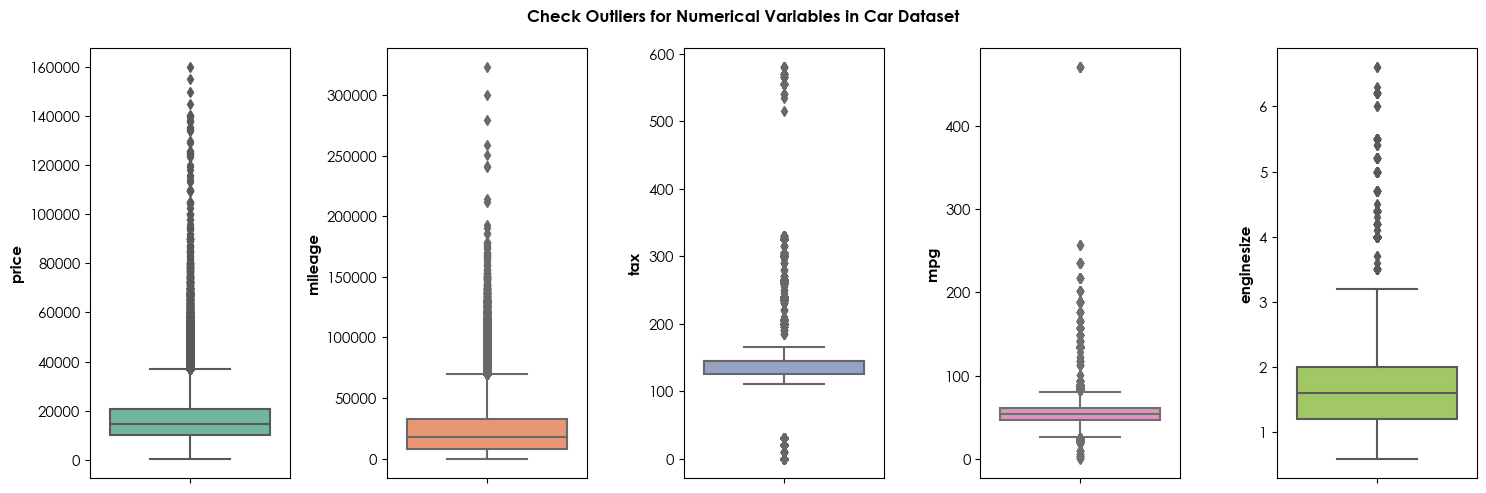

In [15]:
# Visualizing outliers in the numerical columns of the dataset

# Specify numerical columns
numerical_columns = ['price', 'mileage', 'tax', 'mpg', 'enginesize']

# Initialize subplot grid structure as a 1x5 grid
fig, axMany = plt.subplots(1, 5, figsize=(15, 5)) 

# Set color palette and font style
palette = sns.color_palette("Set2")
plt.rcParams['font.family'] = 'Century Gothic'

# Plot boxplots for each numerical column
for i, item in enumerate(numerical_columns):
    sns.boxplot(y=car_df[item], ax=axMany[i], color=palette[i % len(palette)])

# Update font size for labels and ticks
for ax in axMany:
    ax.set_ylabel(ax.get_ylabel(), fontsize=11, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=11)

# Set the title for the entire grid
plt.suptitle("Check Outliers for Numerical Variables in Car Dataset", fontsize=12, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()

### FEATURE PROCESSING AND REPRESENTATION OF DATA

- Drop unused / unnecessary columns from the dataset, such as 'model', which may not be helpful in the regression evaluation.

- Use pandas to create dummy variables for categorical variables in the dataset, using the pandas 'get_dummies()' function , representing them as binary variables (0 or 1) for model training.


In [16]:
# Feature Representation of the Dataset

# Create a copy of the original dataset
car_df_final = car_df.copy()

# Drop columns from the dataset
car_df_final.drop('model', axis=1, inplace=True)

# Using pandas function to dummify the categorical variables
categorical_vars = ['transmission', 'fueltype']
car_df_final = pd.get_dummies(car_df_final, columns=categorical_vars, drop_first=True)

# Rename the columns to ensure standardisation in capitalisation
column_rename = {
    'transmission_Manual': 'transmission_manual',
    'transmission_Other': 'transmission_other',
    'transmission_Semi-Auto': 'transmission_semi-auto',
    'fueltype_Electric': 'fueltype_electric',
    'fueltype_Hybrid': 'fueltype_hybrid',
    'fueltype_Other': 'fueltype_other',
    'fueltype_Petrol': 'fueltype_petrol',
}

# Convert boolean columns to integer type (0 and 1)
columns_to_convert = ['transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto', 
                      'fueltype_Electric', 'fueltype_Hybrid', 'fueltype_Other', 'fueltype_Petrol']

for col in columns_to_convert:
    car_df_final[col] = car_df_final[col].astype(int)

# Rename the columns using the mapping dictionary
car_df_final = car_df_final.rename(columns=column_rename)

# Displaying first 5 and last 5 rows of the modified dataset
print("car_df Dataset After Performing Categorical Encoding :")
car_df_final.head()

car_df Dataset After Performing Categorical Encoding :


,year,price,mileage,tax,mpg,enginesize,transmission_manual,transmission_other,transmission_semi-auto,fueltype_electric,fueltype_hybrid,fueltype_other,fueltype_petrol
0,2017,12500,15735,150.0,55.4,1.4,1,0,0,0,0,0,1
1,2016,16500,36203,20.0,64.2,2.0,0,0,0,0,0,0,0
2,2016,11000,29946,30.0,55.4,1.4,1,0,0,0,0,0,1
3,2017,16800,25952,145.0,67.3,2.0,0,0,0,0,0,0,0
4,2019,17300,1998,145.0,49.6,1.0,1,0,0,0,0,0,1


### FEATURE ENGINEERING

In this section, we will be performing feature engineering to create additional features that can help to improve our regression analysis.

We will be adding just one new column, which is the age of the car as age is often a key feature used for car price evaluation.

In [17]:
# Adding new columns for deeper analysis

# Calculate the age of the car
car_df_final['car_age'] = datetime.now().year - car_df['year']

# Show updated dataframe
car_df_final.head()

,year,price,mileage,tax,mpg,enginesize,transmission_manual,transmission_other,transmission_semi-auto,fueltype_electric,fueltype_hybrid,fueltype_other,fueltype_petrol,car_age
0,2017,12500,15735,150.0,55.4,1.4,1,0,0,0,0,0,1,6
1,2016,16500,36203,20.0,64.2,2.0,0,0,0,0,0,0,0,7
2,2016,11000,29946,30.0,55.4,1.4,1,0,0,0,0,0,1,7
3,2017,16800,25952,145.0,67.3,2.0,0,0,0,0,0,0,0,6
4,2019,17300,1998,145.0,49.6,1.0,1,0,0,0,0,0,1,4


### SPLITTING THE DATA FOR TRAINING AND TESTING

1. Splitting the Data

- The dataset is divided into two components: features (X) and the target variable (y), which is essential for training and testing the model accurately.
- The features (X) are obtained by excluding the 'price' column from the car_df DataFrame, using the drop function with the axis parameter being set to 1.
- The target variable (y) is extracted from the car_df DataFrame, specifically the Price column. 

2. Splitting into Training and Testing Sets

- The function splits the data into four sets: X_train (features for training), X_test (features for testing), y_train (target variable for training), and y_test (target variable for testing). The test_size parameter of 0.2 specifies the proportion of the data to be allocated for testing of the data. 

In [18]:
# Splitting the Data for Model

# Split the data into features (X) and the target variable (y)
X = car_df_final.drop(['price'], axis = 1)
y = car_df_final['price']
print("Dimensions of the DataFrame:")
print(X.shape, y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

Dimensions of the DataFrame:
(105854, 13) (105854,)


### SCALING AND NORMALIZING NUMERICAL FEATURES

- For X_train data, scale and fit_transform using RobustScaler().
- For X_test data, scale and transform using RobustScaler().
- RobustScaler() is used due to outliers found in the price column, and this scaler is less sensitive to outliers, enabling it to be less influenced by extreme values, as well as preserve the shape of distribution provided by the data, leading to a more accurate scale of values provided.

In [19]:
# Normalizing the numerical features

# Use RobustScaler to scale the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Displaying transformed data
print(f"Scaled Training Data : \n\n{X_train_scaled}")
print(f"\nScaled Test Data : \n\n{X_test}")

Scaled Training Data : 

[[-0.66666667  0.78477282  2.75       ...  0.         -1.
   0.66666667]
 [-1.66666667  1.38013443 -5.75       ...  0.         -1.
   1.66666667]
 [ 0.          0.1131946   0.         ...  0.         -1.
   0.        ]
 ...
 [ 0.66666667 -0.22566256 -0.25       ...  0.         -1.
  -0.66666667]
 [-0.66666667  1.97149951 -6.25       ...  0.          0.
   0.66666667]
 [ 0.66666667 -0.54272047  0.25       ...  0.          0.
  -0.66666667]]

Scaled Test Data : 

[[-0.33333333  0.70403488 -5.75       ...  0.          0.
   0.33333333]
 [-0.66666667  1.10405103 -6.25       ...  0.         -1.
   0.66666667]
 [ 0.66666667 -0.22247341  0.         ...  0.          0.
  -0.66666667]
 ...
 [-1.33333333  2.11694891 -1.         ...  0.         -1.
   1.33333333]
 [ 0.66666667 -0.46307248  0.         ...  0.          0.
  -0.66666667]
 [-1.66666667  0.96921866 -5.75       ...  0.          0.
   1.66666667]]


### CROSS-VALIDATION OF REGRESSION MODELS

- Compare the performance of different regressors using cross-validation where cv = 6.
- Obtain the median MAPE (Mean Absolute Percentage Error) and RMSE (Root Mean Squared Error) score for each model and plot them using boxplots.
- The lower the MAPE and RMSE scores, the better the model for regression.

Cross-Validation Scores for Each Model :

- MAPE Scores :
1. Random Forest Median Cross-Validation MAPE: 0.1156
2. Linear Regression Median Cross-Validation MAPE: 0.2547
3. Ridge Median Cross-Validation MAPE: 0.2546
4. Gradient Boosting Median Cross-Validation MAPE: 0.1628
5. K-Nearest Neighbors Median Cross-Validation MAPE: 0.1267
6. Lasso Median Cross-Validation MAPE: 0.2546
7. Decision Tree Median Cross-Validation MAPE: 0.1402

- RMSE Scores :
1. Random Forest Median Cross-Validation RMSE: 2962.17
2. Linear Regression Median Cross-Validation RMSE: 5009.0165
3. Ridge Median Cross-Validation RMSE: 5009.0211
4. Gradient Boosting Median Cross-Validation RMSE: 3606.2928
5. K-Nearest Neighbors Median Cross-Validation RMSE: 3285.2398
6. Lasso Median Cross-Validation RMSE: 5010.492
7. Decision Tree Median Cross-Validation RMSE: 3735.9847

- From the cross-validation, the best model with the lowest MAPE and RMSE is **Random Forest Regressor**. Hence, we will use the Random Forest model from cross-validation for hyperparameter tuning.

Cross-Validation Scores:

Random Forest Median Cross-Validation MAPE: 0.1156
Random Forest Median Cross-Validation RMSE: 2962.17

Linear Regression Median Cross-Validation MAPE: 0.2547
Linear Regression Median Cross-Validation RMSE: 5009.0165

Ridge Median Cross-Validation MAPE: 0.2546
Ridge Median Cross-Validation RMSE: 5009.0211

Gradient Boosting Median Cross-Validation MAPE: 0.1628
Gradient Boosting Median Cross-Validation RMSE: 3606.3928

KNN Median Cross-Validation MAPE: 0.1267
KNN Median Cross-Validation RMSE: 3285.2398

Lasso Median Cross-Validation MAPE: 0.2546
Lasso Median Cross-Validation RMSE: 5010.492

Decision Tree Median Cross-Validation MAPE: 0.1402
Decision Tree Median Cross-Validation RMSE: 3735.9847


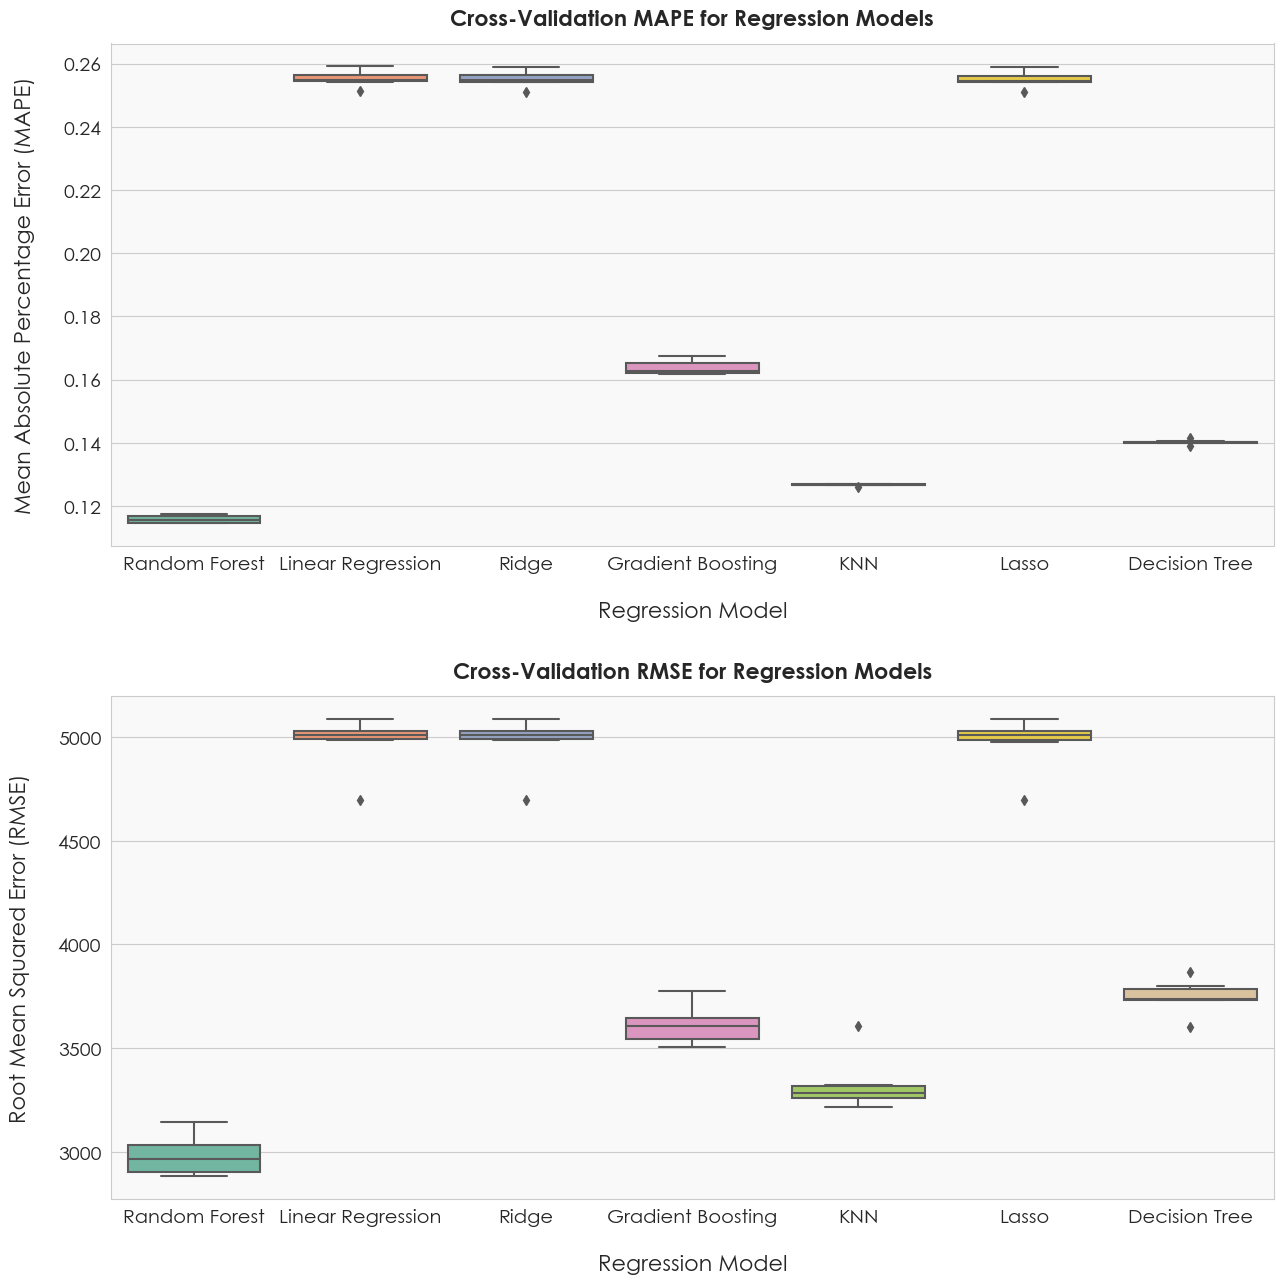

In [59]:
# Initialize the regression models
regressors = {
    'Random Forest': RandomForestRegressor(random_state=21),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=0.1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=21),
    'KNN': KNeighborsRegressor(),
    'Lasso': Lasso(random_state=21),
    'Decision Tree': DecisionTreeRegressor(random_state=21)
}

# Perform cross-validation and collect scores for each regressor
cv_scores_mape = {}
cv_scores_rmse = {}
print("Cross-Validation Scores:")
for reg_name, regressor in regressors.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    scores_mape = cross_val_score(regressor, X_train_scaled, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')
    scores_rmse = cross_val_score(regressor, X_train_scaled, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    cv_scores_mape[reg_name] = -scores_mape  # Negate the scores to get positive MAPE
    cv_scores_rmse[reg_name] = -scores_rmse  # Negate the scores to get positive RMSE
    print(f"\n{reg_name} Median Cross-Validation MAPE:", round(np.median(-scores_mape), 4))
    print(f"{reg_name} Median Cross-Validation RMSE:", round(np.median(-scores_rmse), 4))

# Set the style and font for the plot
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Century Gothic'

# Convert the cv_scores dictionaries to DataFrames
df_scores_mape = pd.DataFrame(cv_scores_mape)
df_scores_rmse = pd.DataFrame(cv_scores_rmse)

# Create subplots for MAPE and RMSE boxplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
fig.subplots_adjust(hspace=0.3)

# Plotting the MAPE boxplot with median values
sns.boxplot(data=df_scores_mape, ax=ax1, palette='Set2')
ax1.set_facecolor('#F9F9F9')
ax1.set_xlabel('Regression Model', fontsize=16, labelpad=20)
ax1.set_ylabel('Mean Absolute Percentage Error (MAPE)', fontsize=16, labelpad=20)
ax1.set_title('Cross-Validation MAPE for Regression Models', fontsize=16, fontweight='bold', y=1.02)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Plotting the RMSE boxplot with median values
sns.boxplot(data=df_scores_rmse, ax=ax2, palette='Set2')
ax2.set_facecolor('#F9F9F9')
ax2.set_xlabel('Regression Model', fontsize=16, labelpad=20)
ax2.set_ylabel('Root Mean Squared Error (RMSE)', fontsize=16, labelpad=20)
ax2.set_title('Cross-Validation RMSE for Regression Models', fontsize=16, fontweight='bold', y=1.02)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

plt.show()

### EVALUATING RANDOM FOREST REGRESSOR MODEL

- Create a param_grid to finetune and improve the Random Forest algorithm for the model.
- Perform GridSearchCV to extensively search for the best parameters that can provide the best scores and set cv = 5 to create 5 folds of data to train.
- Fit the best parameters to the model for training.

Parameters in the Param Grid :

- n_estimators : Number of decision trees to be used in the Random Forest Ensemble
- max_depth : Maximum depth allowed for each decision tree in the Random Forest
- min_samples_split : Controls overfitting by preventing splits with a low number of samples
- min_samples_leaf : Minimum number of samples required to be present in a leaf node
- criterion : Used to evaluate model accuracy based on the best score given by each criterion specified


In [20]:
# Define the parameter grid
param_distributions = {
    'n_estimators': [10, 20, 50, 100], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at a leaf node
    'criterion': ['friedman_mse', 'squared_error'],  # Function to measure the quality of a split
}

# Create a RandomForestRegressor
rf = RandomForestRegressor(random_state=21)

# Perform randomized search cross-validation
rf_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, cv=3)

# Fit the grid search to the training data
rf_grid.fit(X_train_scaled, y_train)

# Retrieve the best parameters and score from the grid search
best_params = rf_grid.best_params_
best_score = rf_grid.best_score_

print("Best Parameters:", best_params)
print("\nBest Score:", best_score)
print("\n", rf_grid.get_params())

Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'squared_error'}

Best Score: 0.9063381616556102

 {'cv': 3, 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'squared_error', 'estimator__max_depth': None, 'estimator__max_features': 1.0, 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 21, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestRegressor(random_state=21), 'n_iter': 10, 'n_jobs': None, 'param_distributions': {'n_estimators': [10, 20, 50, 100], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], '

In [21]:
# Refitting Using Tuned Random Forest Regressor

# Make predictions and expectations on the test set
y_pred = rf_grid.predict(X_test)
rf_expected = y_test
rf_predicted = y_pred

# Evaluate the model
mse = mean_squared_error(rf_expected, rf_predicted)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((rf_expected - rf_predicted) / rf_expected)) * 100
mae = mean_absolute_error(rf_expected, rf_predicted)
r2 = r2_score(rf_expected, rf_predicted)
evs = explained_variance_score(rf_expected, rf_predicted)

# Print the evaluation metrics
print("\nRegression Model Evaluation Metrics:")
print("-----------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Coefficient: {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")


Regression Model Evaluation Metrics:
-----------------------------------
Mean Squared Error (MSE): 7247929.99
Root Mean Squared Error (RMSE): 2692.20
Mean Absolute Percentage Error (MAPE): 10.93%
Mean Absolute Error (MAE): 1713.48
R-squared Coefficient: 0.92
Explained Variance Score: 0.92


### ANALYZING THE ERRORS MADE BY THE RANDOM FOREST REGRESSOR

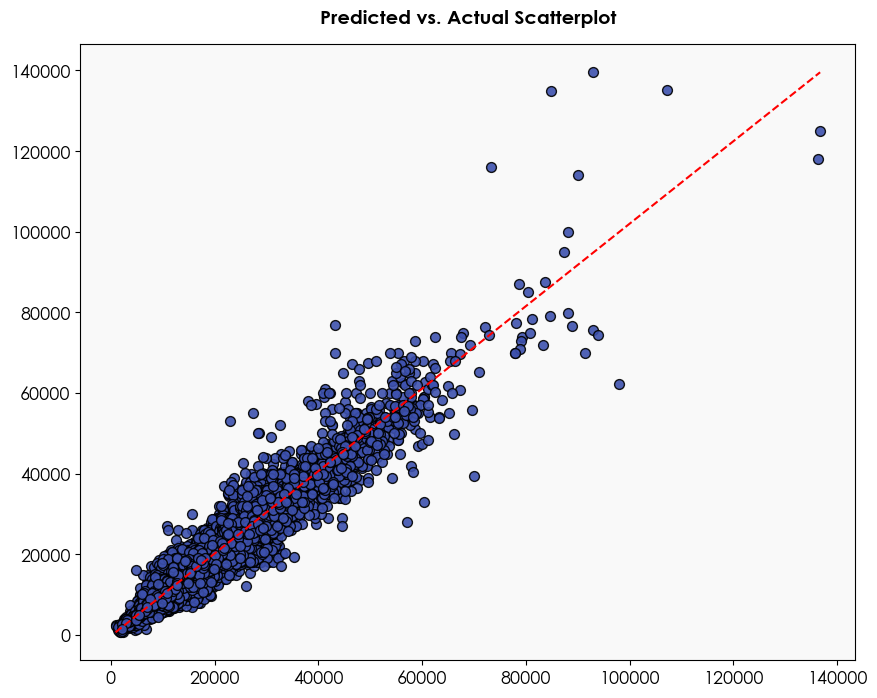

In [22]:
# Plot the scatterplot of R2 Coefficient to Visualise Relationship

# Set the figure size and customise the plot
plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Century Gothic'

# Plot the predicted and actual line
plt.scatter(rf_predicted, rf_expected, color='#3D51AE', label='Predicted', edgecolor='black', s=50, alpha=0.9)
plt.plot([min(rf_predicted), max(rf_predicted)], [min(rf_expected), max(rf_expected)], color='red', linestyle='--', label='Actual')

# Label and customise the plot features
plt.title('Predicted vs. Actual Scatterplot', y=1.02, fontsize=14, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.gca().set_facecolor('#F9F9F9')

plt.show()

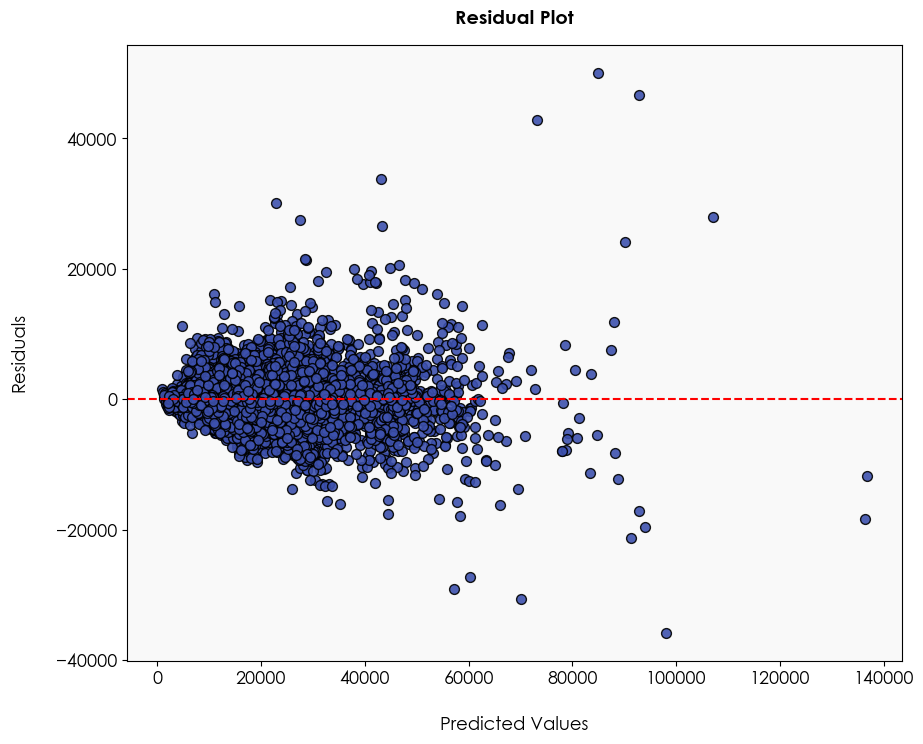

In [23]:
# Plot the residual plot

# Calculate the residuals
residuals = rf_expected - rf_predicted

# Set the figure size and customize the plot
plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Century Gothic'

# Plot the residuals
plt.scatter(rf_predicted, residuals, color='#3D51AE', edgecolor='black', s=50, alpha=0.9)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--')

# Label and customize the plot features
plt.title('Residual Plot', y=1.02, fontsize=14, fontweight='bold')
plt.xlabel('Predicted Values', fontsize=13, labelpad=20)
plt.ylabel('Residuals', fontsize=13, labelpad=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.gca().set_facecolor('#F9F9F9')

plt.show()

### FEATURE IMPORTANCE OF RANDOM FOREST REGRESSOR

- Identify the most important features in the dataset that affects model performance using feature_importances.
- Sort the importances to show the most important feature at the top of the chart.

Analysis of Feature Importance :

- From the feature importance, we can see we made the right choice in making 'car_age' as a variable for our regression model as it was one of the more important features in the dataset.

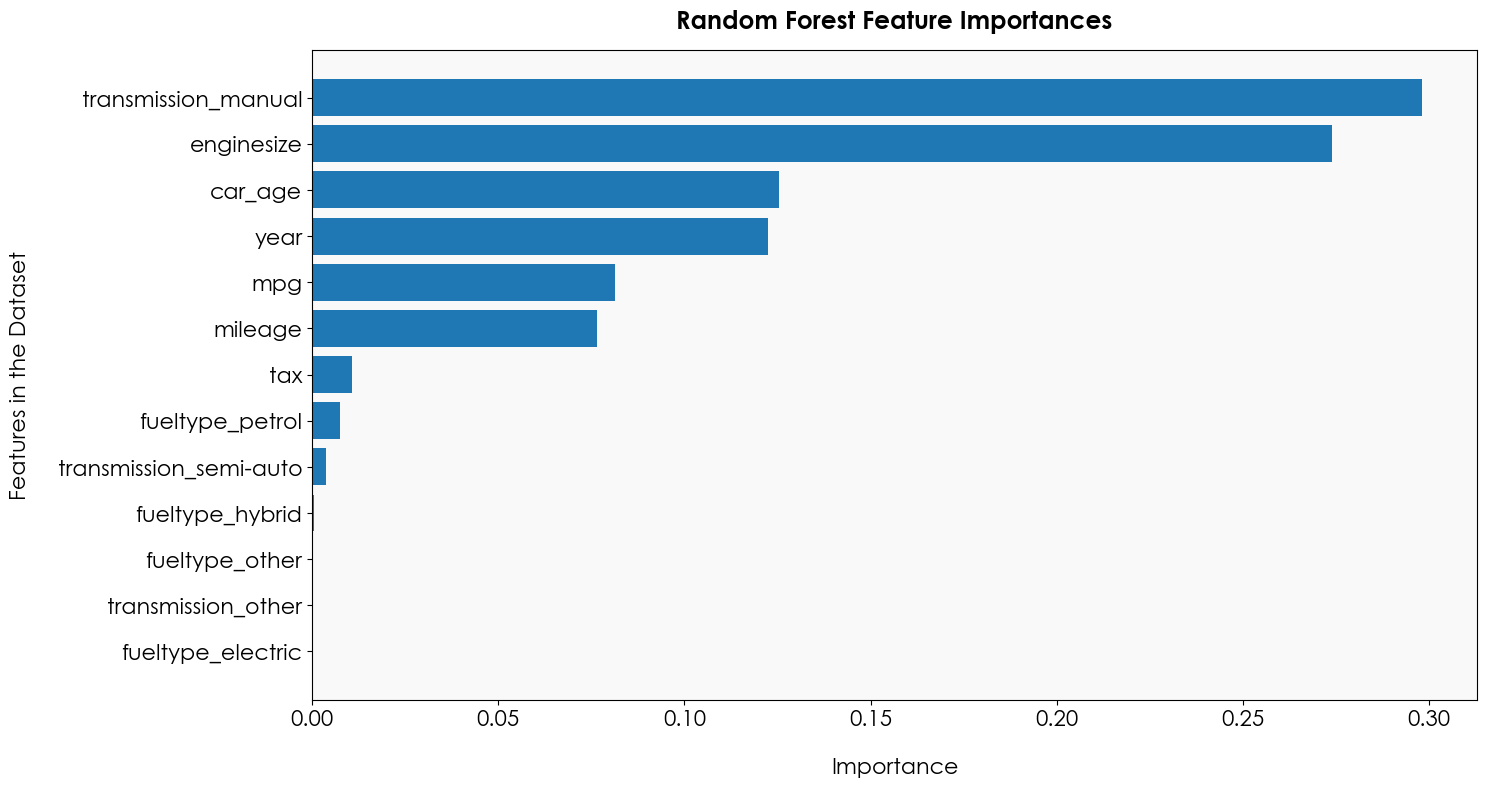

In [24]:
# Feature Selection & Importance for Random Forest

# Create a Random Forest model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Retrieve the feature importances
importances = rf_model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::1]
sorted_features = X_train.columns[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(15, 8))
plt.rcParams['font.family'] = 'Century Gothic'
plt.barh(range(len(sorted_importances)), sorted_importances)

plt.gca().set_facecolor('#F9F9F9')
plt.ylabel('Features in the Dataset', fontsize=16, labelpad=20)
plt.xlabel('Importance', fontsize=16, labelpad=20)
plt.title('Random Forest Feature Importances', fontsize=18, fontweight='bold', y=1.02)
plt.yticks(range(len(sorted_importances)), sorted_features, fontsize=16)
plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

### EVALUATING THE MODEL'S QUALITY WITH A DUMMY BASELINE

- Compare the model to a dummy baseline using DummyRegressor with the strategy = 'median' to predict the median value of 'price' observed in the training data for all instances of the test data.
- For the Dummy Regressor, ‘median’ is used as the strategy as it is less affected by outliers compared to mean, providing a prediction that is less sensitive to outliers in the target variable.
- Create a pipeline to scale the data and create the dummy model.
- Fit the pipeline to the training data and predict on the test set.

In [25]:
# Comparing the Model to a Dummy Baseline
dummy_reg = DummyRegressor(strategy="median")

pipeline = Pipeline([("scaler", RobustScaler()), ('dummymodel', dummy_reg)])

# Fit on training data
pipeline.fit(X_train_scaled, y_train)
# Predict on test data
y_pred = pipeline.predict(X_test)
    
# Make the predictions
expected = y_test
predicted = y_pred

# Print the predicted labels
print("Dummy Regressor Evaluation:\n\nPredicted labels:", predicted)

# Evaluate the model
mse = mean_squared_error(expected, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(expected, y_pred)
r2 = r2_score(expected, y_pred)
evs = explained_variance_score(expected, y_pred)

# Print the evaluation metrics
print("\nDummy Baseline Evaluation Metrics:")
print("-----------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Coefficient: {r2:.2f}")
print(f"Explained Variance Score: {evs:.2f}")

Dummy Regressor Evaluation:

Predicted labels: [14500. 14500. 14500. ... 14500. 14500. 14500.]

Dummy Baseline Evaluation Metrics:
-----------------------------------
Mean Squared Error (MSE): 98206762.89
Root Mean Squared Error (RMSE): 9909.93
Mean Absolute Error (MAE): 6792.38
R-squared Coefficient: -0.06
Explained Variance Score: 0.00


### EXPORTING THE FINAL MODEL AS A PICKLE FILE IN JOBLIB

- To use the model in our web application, we will export the final model as a pickle file in joblib to be used later.

In [26]:
# Save the model to disk
with open('../application/static/joblib_Model.pkl', 'wb') as f:
    joblib.dump(rf_model, f)